# Project 1

# Question 1:

1. [6 points] True or False (1 point each)

babbaa is in a*(ba)*
False since if there is no initial 'a' the rest have to be repetitions of 'ba' or be empty ''.
'bb' is unattainable from (ba)*.

a(ab)* = a(ba)*b
False because aab can be generated from the LHS but the RHS cannot generate 2 initial 'a's

b*a*b*= (bab)*
False the only equivalent strings both sides can generate are the empty string and 'bab'.
but the LHS can create strings that have many 'b's followed by many 'a's followed by many 'b's while the RHS can only do repetitions of 'bab'.

(a | b)* = a*b*
False although the LHS can generate anything the RHS does it can also generate much more since it has the ability to iterate over 'a' and 'b' freely while the RHS can start with 'a's but once it places a 'b' it cannot go back to 'a'

bab is in a*(ba)*
False. any string starting with 'b' must finish with 'a'. (ba)* could generate 'baba' but not 'bab'.

(aa*)(a | ɛ ) = a*
True. Any string generated by the LHS can be generated by the RHS and vice versa


# Question 2:

L= a (a | b*) ab* over the alphabet { a, b }

a. Construct an FSM for L (can be NFSM or a DFSM). You may either draw the FSM or
describe it formally, but the states Q, the start state q0, the accepting states F, and the
transition function δ must be clearly specified. [3 points]

a (a | b*) ab* = (aaab*)|(ab*ab*) -> distributive property


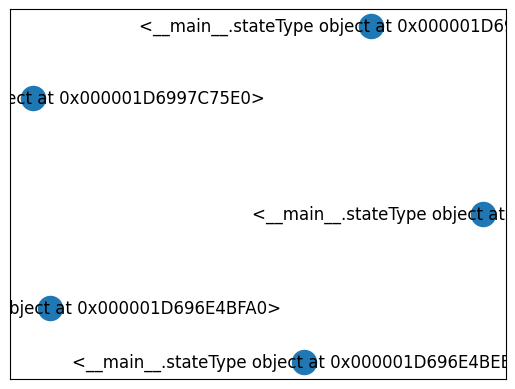

In [22]:
"""NFSM for (aaab*) """

import networkx as nx
import matplotlib.pyplot as plt


class stateType:
    """Creates a state for an NFSM or DFSM"""

    def __init__(self):
        self.inputs = {}
        self.state_name = ''
        self.is_final = False

    def createState(self, name, inputs, is_final):
        self.setStateName(name)
        self.setInputs(inputs)
        self.setFinal(is_final)

    def setStateName(self, new_name):
        self.state_name = new_name

    def setInputs(self, inputs):
        self.inputs = inputs

    def setFinal(self, my_bool):
        self.is_final = my_bool

    def getFinal(self):
        return self.is_final

    def getInputs(self):
        return self.inputs

    def getName(self):
        return self.state_name


class FiniteStateMachine:
    """creates NFSM or DFSM"""

    def __init__(self):
        self.all_states = []
        self.start_state = {}
        self.final_states = []
        self.input_alphabet = set

    def addState(self, new_state, isStart):
        self.all_states.append(new_state)
        if isStart: self.setStart(new_state)
        if new_state.getFinal(): self.final_states.append(new_state)
        self.input_alphabet.update(set(new_state.getInputs().keys()))

    def setStart(self, new_state):
        self.start_state['q0'] = new_state

    def getAllStates(self):
        return self.all_states

    def getStartState(self):
        return self.start_state['q0']

    def createMachine(self):
        self.M = nx.DiGraph()
        self.M.add_nodes_from(self.getAllStates())
        nx.draw_networkx(self.M)
        plt.show()

    def addEdges(self):
        self.edge_list = []
        for each in self.all_states:
            for item in self.createEdgesList(each):
                M.add_edge(item[0].getName(), item[1].getName())


    def createEdgesList(self, state_type):
        self.new_edges_list = []
        new_edge = []
        for each in state_type.getInputs():
            input_list = list(each.keys())
            for item in input_list:
                new_edge.append(state_type.getName())
                new_edge.append(each[item].getName())
            self.new_edges_list.append(new_edge)
        return self.new_edges_list


A = stateType()
B = stateType()
C = stateType()
D = stateType()
E = stateType()

A.createState('q0', {'a': B, 'b': E}, False)
B.createState('q1', {'a': C, 'b': E}, False)
C.createState('q2', {'a': D, 'b': E}, False)
D.createState('q3', {'a': E, 'b': D}, True)
E.createState('q4', {'a': E, 'b': E}, False)

states = [A, B, C, D, E]

F = FiniteStateMachine()
F.addState(A, True)
for each in states:
    F.addState(each, False)

F.createMachine()




